https://levelup.gitconnected.com/clustering-gps-co-ordinates-forming-regions-4f50caa7e4a1

In [1]:
!pip install geopandas
!pip install pandas_bokeh
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 15.4 MB/s 
     |████████████████████████████████| 6.3 MB 51.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import geopandas
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/geo/data/"

Mounted at /content/drive


In [4]:
df = pd.read_csv(f"{path}/Romeoville/zips_954_Volume.csv")
df.tail()

,Unnamed: 0,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,...,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,Volume
1011,1011,62447,US,Neoga,Illinois,IL,Cumberland,35.0,NaN,NaN,...,62447.0,B5,G6350,S,154919439.0,3687700.0,39.314691,-88.448360,"POLYGON ((-88.550609 39.292843, -88.550595 39....",1174.33
1012,1012,62468,US,Toledo,Illinois,IL,Cumberland,35.0,NaN,NaN,...,62468.0,B5,G6350,S,183138082.0,6601.0,39.276946,-88.270309,POLYGON ((-88.41079599999999 39.28944399999999...,2375.54
1013,1013,62469,US,Trilla,Illinois,IL,Coles,29.0,NaN,NaN,...,62469.0,B5,G6350,S,60539441.0,54144.0,39.351236,-88.333827,"POLYGON ((-88.406393 39.343271, -88.406234 39....",274.35
1014,1014,62474,US,Westfield,Illinois,IL,Clark,23.0,NaN,NaN,...,62474.0,B5,G6350,S,93928266.0,34377.0,39.423645,-88.000620,"POLYGON ((-88.063925 39.407876, -88.063923 39....",1319.86
1015,1015,86705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.50


In [5]:
romeo_num_of_days = pd.read_csv(f"{path}/Romeoville/romeo_num_of_days.csv")
romeo_num_of_days = romeo_num_of_days.drop("Unnamed: 0", axis = 1)
romeo_num_of_days.tail() 

,postal_code,num_days
1011,62447,11
1012,62468,30
1013,62469,4
1014,62474,20
1015,86705,1


In [6]:
romeo_num_of_days.max()

postal_code    86705
num_days        3570
dtype: int64

In [19]:
# Variable with the Longitude and Latitude
X = df.loc[:,['postal_code','latitude','longitude']]
X = pd.merge(X, romeo_num_of_days, how="right", on=["postal_code"])
X.head(10)

,postal_code,latitude,longitude,num_days
0,46001,40.2561,-85.6681,60
1,46011,40.1146,-85.7253,410
2,46012,40.1309,-85.6536,283
3,46013,40.0619,-85.6801,388
4,46016,40.0988,-85.6846,141
5,46017,40.0742,-85.6069,117
6,46018,40.1617,-85.7197,5
7,46030,40.1776,-86.0409,98
8,46031,40.2103,-86.0190,61
9,46032,39.9712,-86.1245,2226


In [20]:
# X = X.dropna(axis=0,how='any',subset=['latitude','longitude','num_days'],inplace=True)

In [21]:
X = X[X['latitude'].notna()]
X.isna().sum()

postal_code    0
latitude       0
longitude      0
num_days       0
dtype: int64

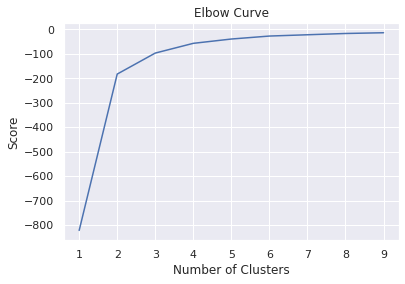

In [22]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = X[['latitude']]
X_axis = X[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# considering only long and lat

In [23]:
kmeans = KMeans(n_clusters = 2, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,postal_code,latitude,longitude,num_days,cluster_label
0,46001,40.2561,-85.6681,60,1
1,46011,40.1146,-85.7253,410,1
2,46012,40.1309,-85.6536,283,1
3,46013,40.0619,-85.6801,388,1
4,46016,40.0988,-85.6846,141,1
5,46017,40.0742,-85.6069,117,1
6,46018,40.1617,-85.7197,5,1
7,46030,40.1776,-86.0409,98,1
8,46031,40.2103,-86.0190,61,1
9,46032,39.9712,-86.1245,2226,1


In [24]:
type(X["latitude"][0])

numpy.float64

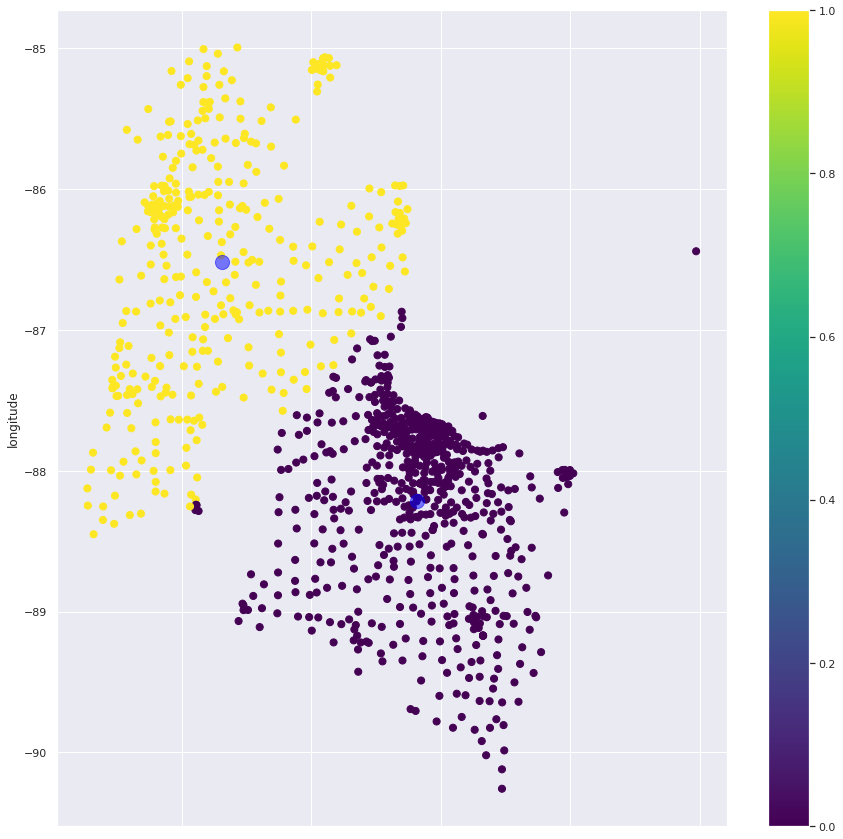

In [25]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis', figsize=(15,15))
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

considering only number of days

In [26]:
zips = geopandas.read_file('/content/drive/MyDrive/geo/tl_2019_us_zcta510/tl_2019_us_zcta510.shp')
zips.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327..."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ..."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."


In [27]:
# kmeans = KMeans(n_clusters = 5, init ='k-means++')
# kmeans.fit(X[X.columns[1:4]]) # Compute k-means clustering.
# X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:4]])
# centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
# labels = kmeans.predict(X[X.columns[1:4]]) # Labels of each point
# X.head(10)

In [28]:
# X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis', figsize=(15,15))
# plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

In [29]:
X


,postal_code,latitude,longitude,num_days,cluster_label
0,46001,40.2561,-85.6681,60,1
1,46011,40.1146,-85.7253,410,1
2,46012,40.1309,-85.6536,283,1
3,46013,40.0619,-85.6801,388,1
4,46016,40.0988,-85.6846,141,1
...,...,...,...,...,...
1010,62442,39.3174,-87.8707,147,1
1011,62447,39.3220,-88.4503,11,1
1012,62468,39.2772,-88.2468,30,1
1013,62469,39.3938,-88.3488,4,1


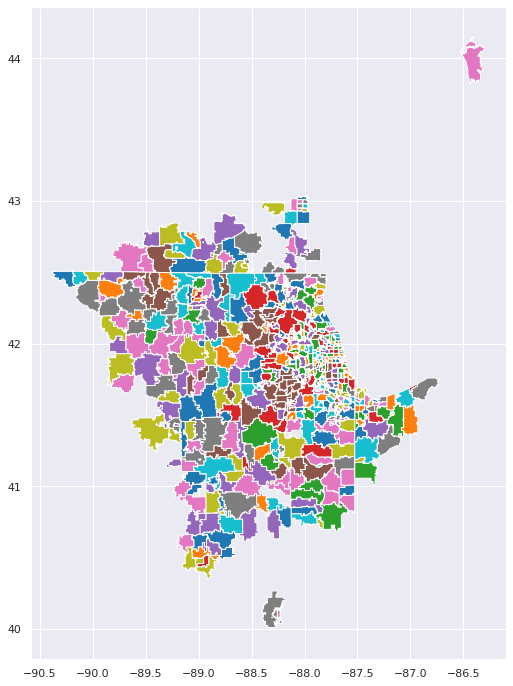

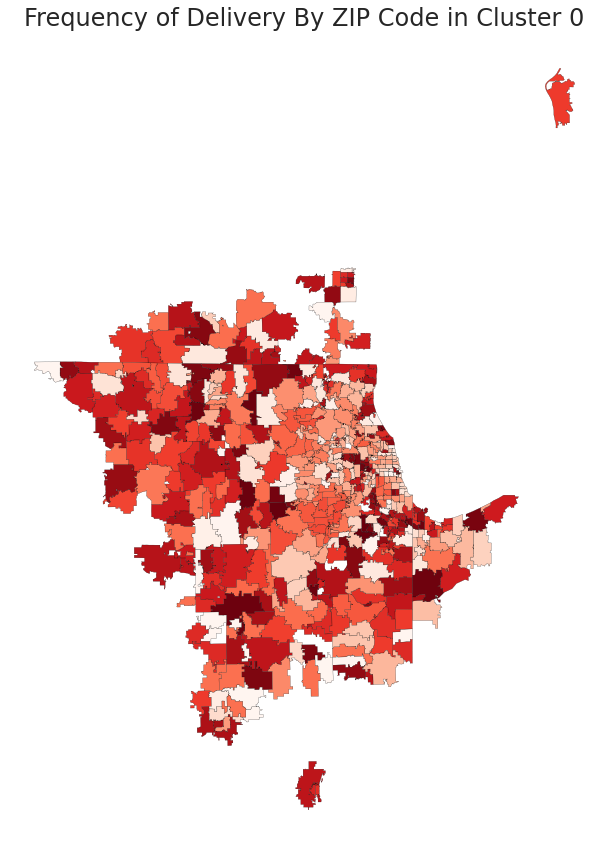

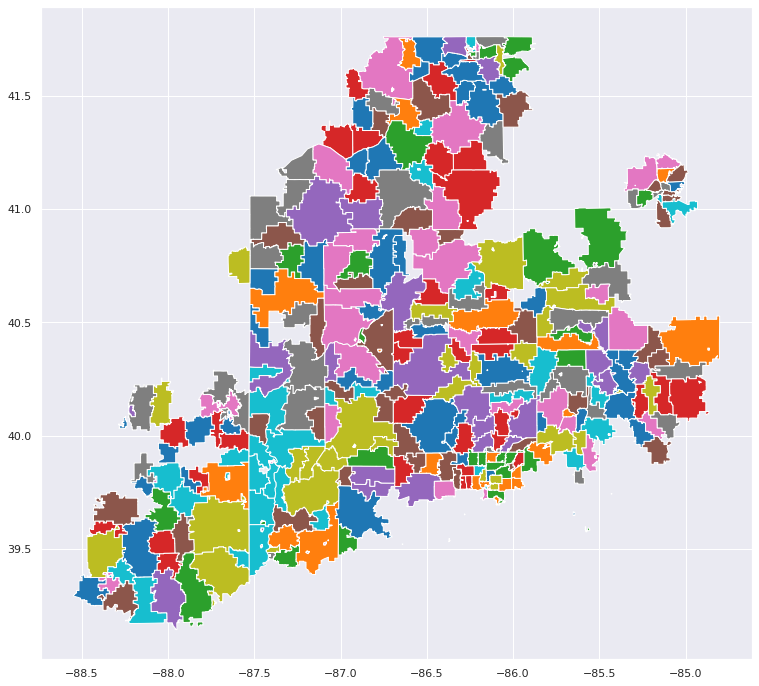

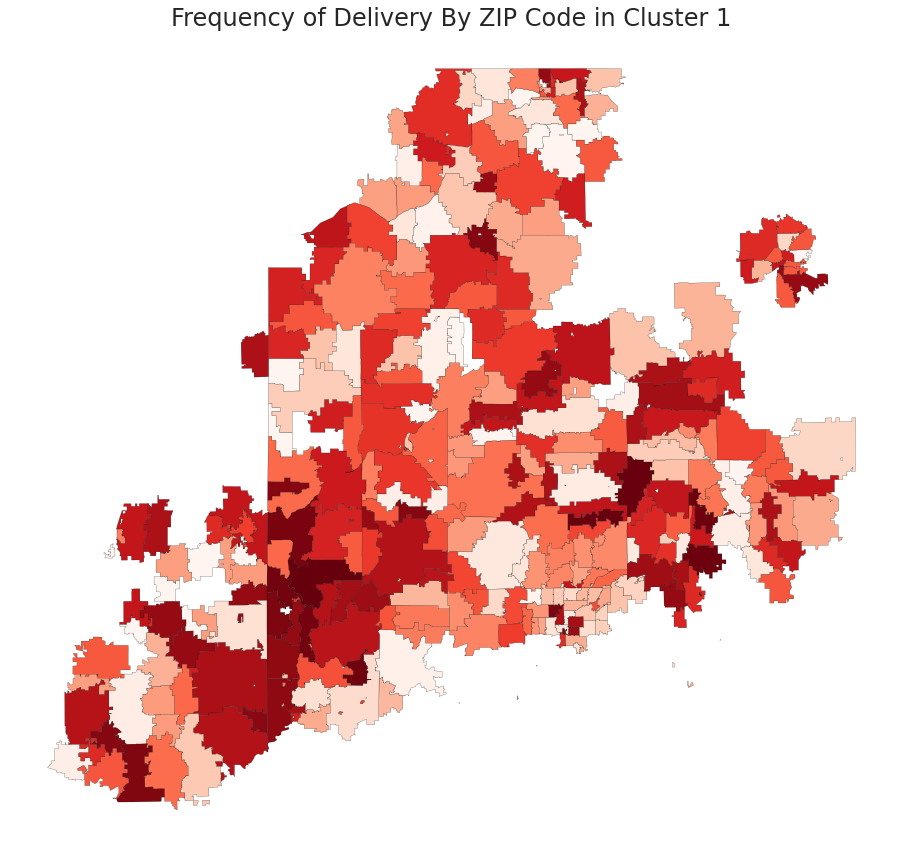

In [30]:
for i in range(2):
    cls =  X[X["cluster_label"] == i]
    cls = cls.rename(columns={"postal_code":"ZCTA5CE10"}).astype(str)
    cluster = pd.merge(zips, cls ,how="right", on=["ZCTA5CE10"])
    fig, ax = plt.subplots(figsize=(16,12))
    cluster.plot(ax=ax, column='num_days');

    fig, ax = plt.subplots(figsize=(20,15))
    ax.axis('off')
    ax.set_title(f'Frequency of Delivery By ZIP Code in Cluster {i}',
                fontdict={'fontsize': 24, 'fontweight':10})
    # plot the map
    cluster.plot(ax=ax, column='num_days',
                edgecolor='black', linewidth=.2,
                cmap='Reds', legend=False ,             legend_kwds={'label': 'num_days'}
                );

    

    # source the data
    # ax.annotate('Source: TIGER/Line Shapefile, 2019, 2010 nation, U.S.,  2010 Census 5-Digit ZIP Code Tabulation Area (ZCTA5) National' ,
    #             xy=(0.05, .2),  xycoords='figure fraction', 
    #             fontsize=18);




Condering each truck has a predefined cluster

In [31]:
zip_codes = pd.read_csv(f"{path}/Delivery_Volume_by_Zip_Data_daily.csv")
zip_codes = zip_codes.T
new_header = zip_codes.iloc[0] #grab the first row for the header
zip_codes = zip_codes[1:] #take the data less the header row
zip_codes.columns = new_header #set the header row as the df header
zip_codes.head()

TransDate,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-09,2010-01-10,...,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30
7545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,142.0,0.0,0.0,240.84,84.31,0.0,0.0,134.0,198.3
00021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
zip_codes=zip_codes.reset_index()
zip_codes = zip_codes.rename(columns={"index":"postal_code"})
zip_codes

TransDate,postal_code,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-09,...,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30
0,7545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,142.0,0.0,0.0,240.84,84.31,0.0,0.0,134.0,198.3
2,00021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17252,N8N4C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17253,R0C3H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17254,S0L2C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17255,S4R8A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X["postal_code"] = X["postal_code"].astype(str)

In [34]:
type(zip_codes["postal_code"][0]), type(X.iloc[0,0])

(str, str)

In [35]:
X

,postal_code,latitude,longitude,num_days,cluster_label
0,46001,40.2561,-85.6681,60,1
1,46011,40.1146,-85.7253,410,1
2,46012,40.1309,-85.6536,283,1
3,46013,40.0619,-85.6801,388,1
4,46016,40.0988,-85.6846,141,1
...,...,...,...,...,...
1010,62442,39.3174,-87.8707,147,1
1011,62447,39.3220,-88.4503,11,1
1012,62468,39.2772,-88.2468,30,1
1013,62469,39.3938,-88.3488,4,1


In [36]:
new_df = pd.merge(X, zip_codes, how="left", on=["postal_code"])
new_df.head(10)

,postal_code,latitude,longitude,num_days,cluster_label,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-05,...,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30
0,46001,40.2561,-85.6681,60,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,161.0,0.0,0.0,0.0,0.0
1,46011,40.1146,-85.7253,410,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,171.28,0.0,40.05,0.0,0.0,42.14,0.0
2,46012,40.1309,-85.6536,283,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46013,40.0619,-85.6801,388,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,65.0,0.0,24.94,0.0,0.0,168.0,0.0
4,46016,40.0988,-85.6846,141,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,46017,40.0742,-85.6069,117,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,46018,40.1617,-85.7197,5,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,46030,40.1776,-86.0409,98,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,46031,40.2103,-86.0190,61,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,46032,39.9712,-86.1245,2226,1,0.0,7.68,2.0,0.0,142.51,...,0.0,131.08,133.06,166.96,0.0,347.22,8.57,0.0,389.98,0.0


In [37]:
new_df = new_df[new_df['latitude'].notna()]
new_df.isna().sum()

postal_code      0
latitude         0
longitude        0
num_days         0
cluster_label    0
                ..
2022-03-26       0
2022-03-27       0
2022-03-28       0
2022-03-29       0
2022-03-30       0
Length: 4477, dtype: int64

In [38]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(new_df[new_df.columns[1:5]]) # Compute k-means clustering.
new_df['cluster_label2'] = kmeans.fit_predict(new_df[new_df.columns[1:5]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(new_df[new_df.columns[1:5]]) # Labels of each point
new_df.head(10)

,postal_code,latitude,longitude,num_days,cluster_label,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-05,...,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,cluster_label2
0,46001,40.2561,-85.6681,60,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,161.0,0.0,0.0,0.0,0.0,0
1,46011,40.1146,-85.7253,410,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,171.28,0.0,40.05,0.0,0.0,42.14,0.0,2
2,46012,40.1309,-85.6536,283,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46013,40.0619,-85.6801,388,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,65.0,0.0,24.94,0.0,0.0,168.0,0.0,2
4,46016,40.0988,-85.6846,141,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,46017,40.0742,-85.6069,117,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,46018,40.1617,-85.7197,5,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,46030,40.1776,-86.0409,98,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,46031,40.2103,-86.0190,61,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,46032,39.9712,-86.1245,2226,1,0.0,7.68,2.0,0.0,142.51,...,131.08,133.06,166.96,0.0,347.22,8.57,0.0,389.98,0.0,4


In [39]:
new_df.iloc[:,]

,postal_code,latitude,longitude,num_days,cluster_label,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-05,...,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,cluster_label2
0,46001,40.2561,-85.6681,60,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,161.0,0.0,0.0,0.0,0.0,0
1,46011,40.1146,-85.7253,410,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,171.28,0.0,40.05,0.0,0.0,42.14,0.0,2
2,46012,40.1309,-85.6536,283,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46013,40.0619,-85.6801,388,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,65.0,0.0,24.94,0.0,0.0,168.0,0.0,2
4,46016,40.0988,-85.6846,141,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,62442,39.3174,-87.8707,147,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1002,62447,39.3220,-88.4503,11,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1003,62468,39.2772,-88.2468,30,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1004,62469,39.3938,-88.3488,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [40]:
for i in range(10):
    temp =  new_df.iloc[:,:3]
    # print(week_df)
    add_col = new_df.iloc[:, -int(i+2)]
    temp = pd.concat([temp, add_col], axis = 1)
    # print(temp)

    cls = temp.rename(columns={"postal_code":"ZCTA5CE10"}).astype(str)
    cluster = pd.merge(zips, cls ,how="right", on=["ZCTA5CE10"])

    fig, ax = plt.subplots(figsize=(16,12))
    cluster.plot(ax=ax, column = temp[temp.columns[3]]);
    # print(temp.columns[3])

#     fig, ax = plt.subplots(figsize=(20,15))
    ax.axis('off')
    ax.set_title(f'Frequency of Delivery By ZIP Code - {temp.columns[3]}',
                fontdict={'fontsize': 20, 'fontweight':10})
    # plot the map
    cluster.plot(ax=ax, column = temp[temp.columns[3]],
                edgecolor='black', linewidth=.2,
                cmap='Reds', legend=False #,             legend_kwds={'label': f'{str(week_df.columns[3])}'}
                );
                
#     # source the data
#     # ax.annotate('Source: TIGER/Line Shapefile, 2019, 2010 nation, U.S.,  2010 Census 5-Digit ZIP Code Tabulation Area (ZCTA5) National' ,
#     #             xy=(0.05, .2),  xycoords='figure fraction', 
#     #             fontsize=18);




# ################################# PLOT DAILY DATA #################################

Output hidden; open in https://colab.research.google.com to view.

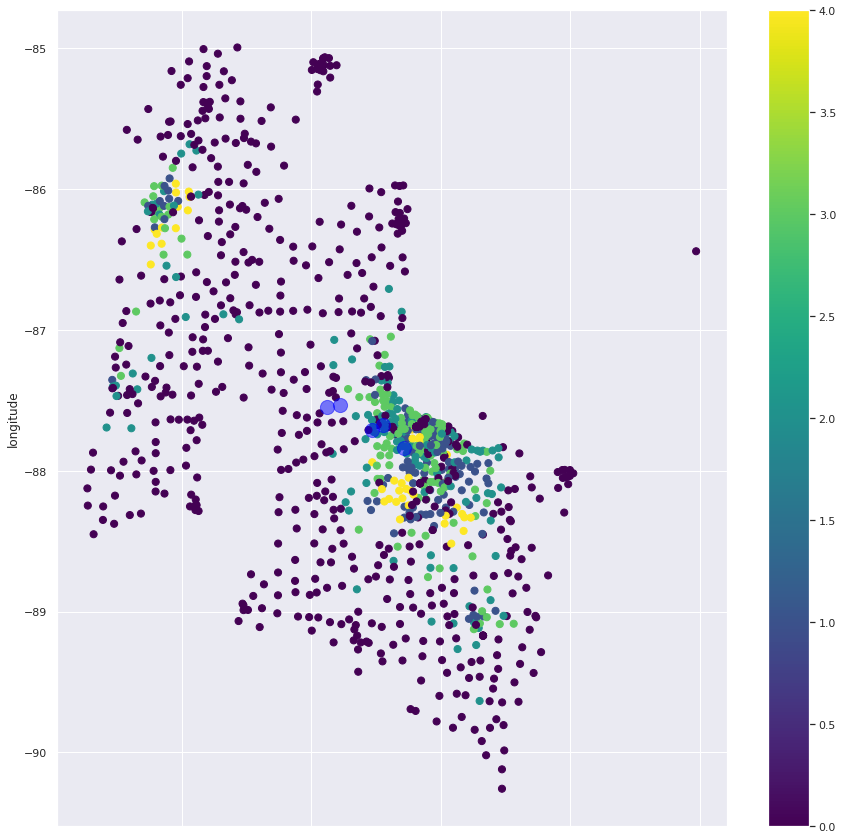

In [41]:
new_df.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis', figsize=(15,15))
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)